<a href="https://colab.research.google.com/github/sujata1606/Final-Year-Project/blob/main/Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Standard imports
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#categorical encoding using Labelencoder
from sklearn.preprocessing import LabelEncoder
num=LabelEncoder()

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
import graphviz
from sklearn.tree import export_graphviz


In [2]:
#Ignore warnings
import warnings
warnings.simplefilter(action ="ignore", category = FutureWarning)

In [ ]:
pd.set_option('display.max_columns',None)

In [3]:
# Get the data ready
df = pd.read_csv("Electronic Products Data.csv")
df

,Timestamp,Name,Age,howoften,Changecell,Uselaptop,Readlaunches,Trynewproduct,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,"Timespend(10,000 - 30,000)","Timespend(30,000 - 50,000)","Timespend(50,000 - 70,000)","Timespend(70,000 - 1,00,000)",Yearlyspending,Factors,Productfeatures,Easeofuse,Warranty,Recommendationfromsomeone,Salespersonrecommendation,NoUseproduct,Rating,Review
0,3/30/2021 15:59,Jaypriya,18-25,Occasionally,Rarely,Always,Very Often,Rarely,New,IT Devices,Laptop,LG,Lenovo,Apple,"50,000 - 60,000","40,000 - 50,000","30,000 - 40,000",During the sale,In an electronics store,No,Ask a friend/colleague/family member for their...,2 - 4 days,1-3 months,1-3 months,1-3 months,"20,000 - 40,000",Pricing of a product,Very important,Very important,Very important,Very important,Very important,Sell on as second-hand,4,Nothing
1,3/30/2021 17:20,Mahadik simran,18-25,Occasionally,Sometimes,Sometimes,Sometimes,Very Often,New,IT Devices,Smartphone,Samsung,Dell,Nokia,"40,000 - 50,000","30,000 - 40,000","60,000 - 70,000",During the sale,In the exclusive brand store,No,Ask a friend/colleague/family member for his o...,2 - 4 days,5-10 days,2 - 4 weeks,1-3 months,"Less than 10,000",Quality of a product,Extremely important,Extremely important,Extremely important,Extremely important,Extremely important,Sell on as second-hand,2,Want to purchase new
2,4/1/2021 17:17,Sahil,25-35,Regularly,Rarely,Always,Always,Rarely,Refurbished,Mobile devices,Smartphone,Whirlpool,Lenovo,OnePlus,"40,000 - 50,000","40,000 - 50,000","20,000 - 30,000",During the sale,In an electronics store,Yes,Compare them with competitive products,Less than 1 day,2 - 4 weeks,2 - 4 weeks,2 - 4 weeks,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Moderately important,Moderately important,Not at all important,Sell on as second-hand,4,Nothing
3,4/1/2021 17:39,Sonali,18-25,Occasionally,Sometimes,Always,Always,Sometimes,New,IT Devices,Laptop,Samsung,HP,Samsung,"20,000 - 30,000","20,000 - 30,000","100 - 10,000",During the sale,In an electronics store,Yes,Compare them with competitive products,5-10 days,2 - 4 days,2 - 4 days,Less than 1 day,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Moderately important,Not at all important,Moderately important,Sell on as second-hand,5,Its amazing
4,4/2/2021 17:39,Namrata,25-35,Regularly,Very Often,Very Often,Very Often,Very Often,New,IT Devices,Laptop,Whirlpool,HP,Nokia,"30,000 - 40,000","60,000 - 70,000","30,000 - 40,000",Without the sale (Off Season),Online,Yes,Ask a friend/colleague/family member for their...,2 - 4 weeks,2 - 4 weeks,2 - 4 days,5-10 days,"60,000 - 80,000",Pricing of a product,Very important,Moderately important,Moderately important,Moderately important,Not at all important,Take to local recycling center,4,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,4/5/2021 17:39,Darshan,25-35,Regularly,Very Often,Always,Always,Sometimes,New,IT Devices,Desktop,Godrej,Acer,HP,"50,000 - 60,000","50,000 - 60,000","40,000 - 50,000",During the sale,Online,Yes,Ask a friend/colleague/family member for his o...,Less than 1 day,2 - 4 weeks,1-3 months,5-10 days,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Very important,Not at all important,Moderately important,Take to local recycling center,3,Good
212,4/6/2021 17:39,Raj,18-25,Occasionally,Rarely,Always,Always,Rarely,Refurbished,Home appliances,Television,Samsung,Dell,OnePlus,"More than 70,000","30,000 - 40,000","40,000 - 50,000",During the sale,In the exclusive brand store,Yes,Ask a friend/colleague/family member for his o...,2 - 4 days,5-10 days,2 - 4 days,5-10 days,"20,000 - 40,000",Reliability of a product,Extremely important,Moderately important,Very important,Not at all i

In [ ]:
df.head()

,Timestamp,Name,Age,howoften,Changecell,Uselaptop,Readlaunches,Trynewproduct,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,"Timespend(10,000 - 30,000)","Timespend(30,000 - 50,000)","Timespend(50,000 - 70,000)","Timespend(70,000 - 1,00,000)",Yearlyspending,Factors,Productfeatures,Easeofuse,Warranty,Recommendationfromsomeone,Salespersonrecommendation,NoUseproduct,Rating,Review
0,3/30/2021 15:59,Jaypriya,18-25,Occasionally,Rarely,Always,Very Often,Rarely,New,IT Devices,Laptop,LG,Lenovo,Apple,"50,000 - 60,000","40,000 - 50,000","30,000 - 40,000",During the sale,In an electronics store,No,Ask a friend/colleague/family member for their...,2 - 4 days,1-3 months,1-3 months,1-3 months,"20,000 - 40,000",Pricing of a product,Very important,Very important,Very important,Very important,Very important,Sell on as second-hand,4,Nothing
1,3/30/2021 17:20,Mahadik simran,18-25,Occasionally,Sometimes,Sometimes,Sometimes,Very Often,New,IT Devices,Smartphone,Samsung,Dell,Nokia,"40,000 - 50,000","30,000 - 40,000","60,000 - 70,000",During the sale,In the exclusive brand store,No,Ask a friend/colleague/family member for his o...,2 - 4 days,5-10 days,2 - 4 weeks,1-3 months,"Less than 10,000",Quality of a product,Extremely important,Extremely important,Extremely important,Extremely important,Extremely important,Sell on as second-hand,2,Want to purchase new
2,4/1/2021 17:17,Sahil,25-35,Regularly,Rarely,Always,Always,Rarely,Refurbished,Mobile devices,Smartphone,Whirlpool,Lenovo,OnePlus,"40,000 - 50,000","40,000 - 50,000","20,000 - 30,000",During the sale,In an electronics store,Yes,Compare them with competitive products,Less than 1 day,2 - 4 weeks,2 - 4 weeks,2 - 4 weeks,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Moderately important,Moderately important,Not at all important,Sell on as second-hand,4,Nothing
3,4/1/2021 17:39,Sonali,18-25,Occasionally,Sometimes,Always,Always,Sometimes,New,IT Devices,Laptop,Samsung,HP,Samsung,"20,000 - 30,000","20,000 - 30,000","100 - 10,000",During the sale,In an electronics store,Yes,Compare them with competitive products,5-10 days,2 - 4 days,2 - 4 days,Less than 1 day,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Moderately important,Not at all important,Moderately important,Sell on as second-hand,5,Its amazing
4,4/2/2021 17:39,Namrata,25-35,Regularly,Very Often,Very Often,Very Often,Very Often,New,IT Devices,Laptop,Whirlpool,HP,Nokia,"30,000 - 40,000","60,000 - 70,000","30,000 - 40,000",Without the sale (Off Season),Online,Yes,Ask a friend/colleague/family member for their...,2 - 4 weeks,2 - 4 weeks,2 - 4 days,5-10 days,"60,000 - 80,000",Pricing of a product,Very important,Moderately important,Moderately important,Moderately important,Not at all important,Take to local recycling center,4,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Timestamp                     216 non-null    object
 1   Name                          216 non-null    object
 2   Age                           216 non-null    object
 3   howoften                      216 non-null    object
 4   Changecell                    216 non-null    object
 5   Uselaptop                     216 non-null    object
 6   Readlaunches                  216 non-null    object
 7   Trynewproduct                 216 non-null    object
 8   Type                          216 non-null    object
 9   Product                       216 non-null    object
 10  Item                          216 non-null    object
 11  Brand(HomeAppliances)         216 non-null    object
 12  Brand(ITDevices)              216 non-null    object
 13  Brand(MobileDevices)

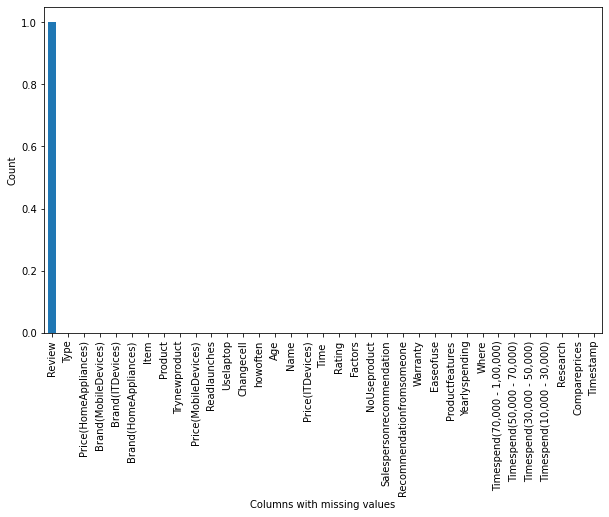

In [5]:
missing=df.isna().sum().sort_values(ascending=False)
missing.plot.bar(figsize=(10,6))
plt.xlabel('Columns with missing values')
plt.ylabel('Count')
plt.show()

In [ ]:
missing

Review                          1
Type                            0
Price(HomeAppliances)           0
Brand(MobileDevices)            0
Brand(ITDevices)                0
Brand(HomeAppliances)           0
Item                            0
Product                         0
Trynewproduct                   0
Price(MobileDevices)            0
Readlaunches                    0
Uselaptop                       0
Changecell                      0
howoften                        0
Age                             0
Name                            0
Price(ITDevices)                0
Time                            0
Rating                          0
Factors                         0
NoUseproduct                    0
Salespersonrecommendation       0
Recommendationfromsomeone       0
Warranty                        0
Easeofuse                       0
Productfeatures                 0
Yearlyspending                  0
Where                           0
Timespend(70,000 - 1,00,000)    0
Timespend(50,0

In [6]:
#filling missing data
df=df.fillna(method='ffill')
df

,Timestamp,Name,Age,howoften,Changecell,Uselaptop,Readlaunches,Trynewproduct,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,"Timespend(10,000 - 30,000)","Timespend(30,000 - 50,000)","Timespend(50,000 - 70,000)","Timespend(70,000 - 1,00,000)",Yearlyspending,Factors,Productfeatures,Easeofuse,Warranty,Recommendationfromsomeone,Salespersonrecommendation,NoUseproduct,Rating,Review
0,3/30/2021 15:59,Jaypriya,18-25,Occasionally,Rarely,Always,Very Often,Rarely,New,IT Devices,Laptop,LG,Lenovo,Apple,"50,000 - 60,000","40,000 - 50,000","30,000 - 40,000",During the sale,In an electronics store,No,Ask a friend/colleague/family member for their...,2 - 4 days,1-3 months,1-3 months,1-3 months,"20,000 - 40,000",Pricing of a product,Very important,Very important,Very important,Very important,Very important,Sell on as second-hand,4,Nothing
1,3/30/2021 17:20,Mahadik simran,18-25,Occasionally,Sometimes,Sometimes,Sometimes,Very Often,New,IT Devices,Smartphone,Samsung,Dell,Nokia,"40,000 - 50,000","30,000 - 40,000","60,000 - 70,000",During the sale,In the exclusive brand store,No,Ask a friend/colleague/family member for his o...,2 - 4 days,5-10 days,2 - 4 weeks,1-3 months,"Less than 10,000",Quality of a product,Extremely important,Extremely important,Extremely important,Extremely important,Extremely important,Sell on as second-hand,2,Want to purchase new
2,4/1/2021 17:17,Sahil,25-35,Regularly,Rarely,Always,Always,Rarely,Refurbished,Mobile devices,Smartphone,Whirlpool,Lenovo,OnePlus,"40,000 - 50,000","40,000 - 50,000","20,000 - 30,000",During the sale,In an electronics store,Yes,Compare them with competitive products,Less than 1 day,2 - 4 weeks,2 - 4 weeks,2 - 4 weeks,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Moderately important,Moderately important,Not at all important,Sell on as second-hand,4,Nothing
3,4/1/2021 17:39,Sonali,18-25,Occasionally,Sometimes,Always,Always,Sometimes,New,IT Devices,Laptop,Samsung,HP,Samsung,"20,000 - 30,000","20,000 - 30,000","100 - 10,000",During the sale,In an electronics store,Yes,Compare them with competitive products,5-10 days,2 - 4 days,2 - 4 days,Less than 1 day,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Moderately important,Not at all important,Moderately important,Sell on as second-hand,5,Its amazing
4,4/2/2021 17:39,Namrata,25-35,Regularly,Very Often,Very Often,Very Often,Very Often,New,IT Devices,Laptop,Whirlpool,HP,Nokia,"30,000 - 40,000","60,000 - 70,000","30,000 - 40,000",Without the sale (Off Season),Online,Yes,Ask a friend/colleague/family member for their...,2 - 4 weeks,2 - 4 weeks,2 - 4 days,5-10 days,"60,000 - 80,000",Pricing of a product,Very important,Moderately important,Moderately important,Moderately important,Not at all important,Take to local recycling center,4,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,4/5/2021 17:39,Darshan,25-35,Regularly,Very Often,Always,Always,Sometimes,New,IT Devices,Desktop,Godrej,Acer,HP,"50,000 - 60,000","50,000 - 60,000","40,000 - 50,000",During the sale,Online,Yes,Ask a friend/colleague/family member for his o...,Less than 1 day,2 - 4 weeks,1-3 months,5-10 days,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Very important,Not at all important,Moderately important,Take to local recycling center,3,Good
212,4/6/2021 17:39,Raj,18-25,Occasionally,Rarely,Always,Always,Rarely,Refurbished,Home appliances,Television,Samsung,Dell,OnePlus,"More than 70,000","30,000 - 40,000","40,000 - 50,000",During the sale,In the exclusive brand store,Yes,Ask a friend/colleague/family member for his o...,2 - 4 days,5-10 days,2 - 4 days,5-10 days,"20,000 - 40,000",Reliability of a product,Extremely important,Moderately important,Very important,Not at all i

In [8]:
df.drop(['Timestamp', 'Name','NoUseproduct','Review','Changecell','Uselaptop','Readlaunches','Trynewproduct','Timespend(10,000 - 30,000)','Timespend(30,000 - 50,000)','Timespend(50,000 - 70,000)','Timespend(70,000 - 1,00,000)','Productfeatures','Easeofuse','Warranty','Recommendationfromsomeone','Salespersonrecommendation'],axis=1,inplace=True)

In [7]:
def split_multicolumn(Factors):
    result_df = Factors.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in Factors[Factors.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [ ]:
Type_df = split_multicolumn(df.Factors)
Type_split = Type_df.sum().sort_values(ascending=True)

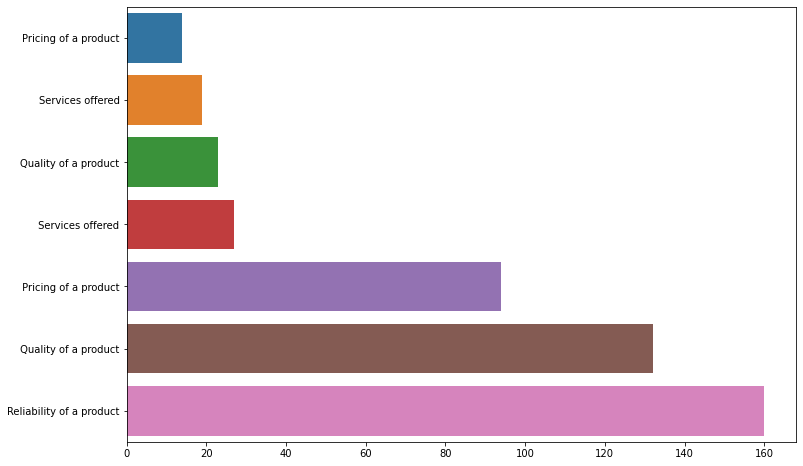

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=Type_split.values, y=Type_split.index);

In [ ]:
def split_multicolumn(Research):
    result_df = Research.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in Research[Research.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [ ]:
Type_df = split_multicolumn(df.Research)
Type_split = Type_df.sum().sort_values(ascending=False)

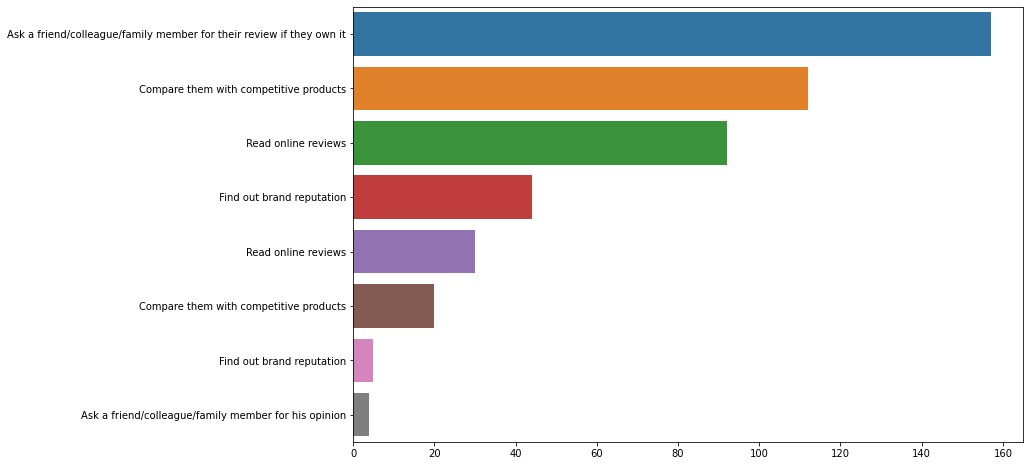

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=Type_split.values, y=Type_split.index);

In [ ]:
df

,Age,howoften,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,Yearlyspending,Factors,Rating
0,18-25,Occasionally,New,IT Devices,Laptop,LG,Lenovo,Apple,"50,000 - 60,000","40,000 - 50,000","30,000 - 40,000",During the sale,In an electronics store,No,Ask a friend/colleague/family member for their...,"20,000 - 40,000",Pricing of a product,4
1,18-25,Occasionally,New,IT Devices,Smartphone,Samsung,Dell,Nokia,"40,000 - 50,000","30,000 - 40,000","60,000 - 70,000",During the sale,In the exclusive brand store,No,Ask a friend/colleague/family member for his o...,"Less than 10,000",Quality of a product,2
2,25-35,Regularly,Refurbished,Mobile devices,Smartphone,Whirlpool,Lenovo,OnePlus,"40,000 - 50,000","40,000 - 50,000","20,000 - 30,000",During the sale,In an electronics store,Yes,Compare them with competitive products,"20,000 - 40,000",Quality of a product,4
3,18-25,Occasionally,New,IT Devices,Laptop,Samsung,HP,Samsung,"20,000 - 30,000","20,000 - 30,000","100 - 10,000",During the sale,In an electronics store,Yes,Compare them with competitive products,"20,000 - 40,000",Quality of a product,5
4,25-35,Regularly,New,IT Devices,Laptop,Whirlpool,HP,Nokia,"30,000 - 40,000","60,000 - 70,000","30,000 - 40,000",Without the sale (Off Season),Online,Yes,Ask a friend/colleague/family member for their...,"60,000 - 80,000",Pricing of a product,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,25-35,Regularly,New,IT Devices,Desktop,Godrej,Acer,HP,"50,000 - 60,000","50,000 - 60,000","40,000 - 50,000",During the sale,Online,Yes,Ask a friend/colleague/family member for his o...,"20,000 - 40,000",Quality of a product,3
212,18-25,Occasionally,Refurbished,Home appliances,Television,Samsung,Dell,OnePlus,"More than 70,000","30,000 - 40,000","40,000 - 50,000",During the sale,In the exclusive brand store,Yes,Ask a friend/colleague/family member for his o...,"20,000 - 40,000",Reliability of a product,4
213,25-35,Regularly,New,Mobile devices,Smartphone,LG,Apple,Apple,"More than 70,000","20,000 - 30,000","50,000 - 60,000",During the sale,Online,Yes,Find out brand reputation,"60,000 - 80,000",Services offered,4
214,18-25,Occasionally,New,Mobile devices,Earphones,Godrej,Acer,Realme,"100 - 10,000","50,000 - 60,000","10,000 - 20,000",Without the sale (Off Season),Online,Yes,Read online reviews,"Less than 10,000",Quality of a product,4


In [9]:
#Using labelEncoder
df['Age']=num.fit_transform(df['Age']).astype('int')
df['Type']=num.fit_transform(df['Type']).astype('int')
df['Brand(HomeAppliances)']=num.fit_transform(df['Brand(HomeAppliances)']).astype('int')
df['Brand(ITDevices)']=num.fit_transform(df['Brand(ITDevices)']).astype('int')
df['Brand(MobileDevices)']=num.fit_transform(df['Brand(MobileDevices)']).astype('int')
df['Price(HomeAppliances)']=num.fit_transform(df['Price(HomeAppliances)']).astype('int')
df['Price(ITDevices)']=num.fit_transform(df['Price(ITDevices)']).astype('int')
df['Price(MobileDevices)']=num.fit_transform(df['Price(MobileDevices)']).astype('int')
df['Yearlyspending']=num.fit_transform(df['Yearlyspending']).astype('int')
df['Research']=num.fit_transform(df['Research']).astype('int')
df['Product']=num.fit_transform(df['Product']).astype('int')
df['Item']=num.fit_transform(df['Item']).astype('int')
df['Time ']=num.fit_transform(df['Time ']).astype('int')
df.sample(5)

,Age,howoften,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,Yearlyspending,Factors,Rating
184,1,Occasionally,1,7,19,7,6,8,3,2,0,1,"Online, In the exclusive brand store, In an el...",Yes,6,2,"Reliability of a product, Pricing of a product...",4
45,0,Regularly,0,5,9,3,6,7,1,3,2,1,"In the exclusive brand store, In an electronic...",Yes,11,0,Services offered,2
122,3,Occasionally,1,1,24,7,3,8,3,2,0,1,In an electronics store,Yes,4,2,"Reliability of a product, Pricing of a product",4
94,1,Occasionally,0,5,19,4,6,8,6,5,4,0,"Online, In the exclusive brand store, In an el...",Yes,6,2,"Reliability of a product, Pricing of a product",5
214,0,Occasionally,0,7,8,1,0,8,1,5,0,1,Online,Yes,12,4,Quality of a product,4


In [10]:
dummies = pd.get_dummies(df[["howoften","Where" ,"Compareprices","Factors"]])
dummies

,howoften_Occasionally,howoften_Regularly,Where_In an electronics store,Where_In the exclusive brand store,"Where_In the exclusive brand store, In an electronics store",Where_Online,"Where_Online, In an electronics store","Where_Online, In an electronics store, Other sources","Where_Online, In the exclusive brand store","Where_Online, In the exclusive brand store, In an electronics store","Where_Online, In the exclusive brand store, In an electronics store, Other sources",Where_Other sources,Compareprices_No,Compareprices_Yes,Factors_Pricing of a product,"Factors_Pricing of a product, Quality of a product",Factors_Quality of a product,Factors_Reliability of a product,"Factors_Reliability of a product, Pricing of a product","Factors_Reliability of a product, Pricing of a product, Quality of a product","Factors_Reliability of a product, Quality of a product","Factors_Reliability of a product, Services offered","Factors_Reliability of a product, Services offered, Pricing of a product","Factors_Reliability of a product, Services offered, Pricing of a product, Quality of a product","Factors_Reliability of a product, Services offered, Quality of a product",Factors_Services offered,"Factors_Services offered, Pricing of a product","Factors_Services offered, Pricing of a product, Quality of a product","Factors_Services offered, Quality of a product"
0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
212,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
213,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
214,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
merge = pd.concat([df,dummies],axis='columns')
merge

,Age,howoften,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,Yearlyspending,Factors,Rating,howoften_Occasionally,howoften_Regularly,Where_In an electronics store,Where_In the exclusive brand store,"Where_In the exclusive brand store, In an electronics store",Where_Online,"Where_Online, In an electronics store","Where_Online, In an electronics store, Other sources","Where_Online, In the exclusive brand store","Where_Online, In the exclusive brand store, In an electronics store","Where_Online, In the exclusive brand store, In an electronics store, Other sources",Where_Other sources,Compareprices_No,Compareprices_Yes,Factors_Pricing of a product,"Factors_Pricing of a product, Quality of a product",Factors_Quality of a product,Factors_Reliability of a product,"Factors_Reliability of a product, Pricing of a product","Factors_Reliability of a product, Pricing of a product, Quality of a product","Factors_Reliability of a product, Quality of a product","Factors_Reliability of a product, Services offered","Factors_Reliability of a product, Services offered, Pricing of a product","Factors_Reliability of a product, Services offered, Pricing of a product, Quality of a product","Factors_Reliability of a product, Services offered, Quality of a product",Factors_Services offered,"Factors_Services offered, Pricing of a product","Factors_Services offered, Pricing of a product, Quality of a product","Factors_Services offered, Quality of a product"
0,0,Occasionally,0,5,9,3,6,0,5,4,3,0,In an electronics store,No,1,1,Pricing of a product,4,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,Occasionally,0,5,19,4,3,4,4,3,6,0,In the exclusive brand store,No,0,4,Quality of a product,2,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,Regularly,1,7,19,7,6,6,4,4,2,0,In an electronics store,Yes,9,1,Quality of a product,4,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,Occasionally,0,5,9,4,5,10,2,2,1,0,In an electronics store,Yes,9,1,Quality of a product,5,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,Regularly,0,5,9,7,5,4,3,6,3,1,Online,Yes,1,3,Pricing of a product,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,Regularly,0,5,4,1,0,1,5,5,4,0,Online,Yes,0,1,Quality of a product,3,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
212,0,Occasionally,1,1,24,4,3,6,8,3,4,0,In the exclusive brand store,Yes,0,1,Reliability of a product,4,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
213,1,Regularly,0,7,19,3,2,0,8,2,5,0,Online,Yes,11,3,Services offered,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
214,0,Occasionally,0,7,8,1,0,8,1,5,0,1,Online,Yes,12,4,Quality of a product,4,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
final = merge.drop(['howoften','Where','Factors','Compareprices'],axis='columns')
final

,Age,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Research,Yearlyspending,Rating,howoften_Occasionally,howoften_Regularly,Where_In an electronics store,Where_In the exclusive brand store,"Where_In the exclusive brand store, In an electronics store",Where_Online,"Where_Online, In an electronics store","Where_Online, In an electronics store, Other sources","Where_Online, In the exclusive brand store","Where_Online, In the exclusive brand store, In an electronics store","Where_Online, In the exclusive brand store, In an electronics store, Other sources",Where_Other sources,Compareprices_No,Compareprices_Yes,Factors_Pricing of a product,"Factors_Pricing of a product, Quality of a product",Factors_Quality of a product,Factors_Reliability of a product,"Factors_Reliability of a product, Pricing of a product","Factors_Reliability of a product, Pricing of a product, Quality of a product","Factors_Reliability of a product, Quality of a product","Factors_Reliability of a product, Services offered","Factors_Reliability of a product, Services offered, Pricing of a product","Factors_Reliability of a product, Services offered, Pricing of a product, Quality of a product","Factors_Reliability of a product, Services offered, Quality of a product",Factors_Services offered,"Factors_Services offered, Pricing of a product","Factors_Services offered, Pricing of a product, Quality of a product","Factors_Services offered, Quality of a product"
0,0,0,5,9,3,6,0,5,4,3,0,1,1,4,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,5,19,4,3,4,4,3,6,0,0,4,2,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,7,19,7,6,6,4,4,2,0,9,1,4,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,5,9,4,5,10,2,2,1,0,9,1,5,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,5,9,7,5,4,3,6,3,1,1,3,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,0,5,4,1,0,1,5,5,4,0,0,1,3,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
212,0,1,1,24,4,3,6,8,3,4,0,0,1,4,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
213,1,0,7,19,3,2,0,8,2,5,0,11,3,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
214,0,0,7,8,1,0,8,1,5,0,1,12,4,4,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
final.dtypes

Age                                                                                               int64
Type                                                                                              int64
Product                                                                                           int64
Item                                                                                              int64
Brand(HomeAppliances)                                                                             int64
Brand(ITDevices)                                                                                  int64
Brand(MobileDevices)                                                                              int64
Price(HomeAppliances)                                                                             int64
Price(ITDevices)                                                                                  int64
Price(MobileDevices)                                            

In [66]:
final.columns

Index(['Age', 'Type', 'Product', 'Item', 'Brand(HomeAppliances)',
       'Brand(ITDevices)', 'Brand(MobileDevices)', 'Price(HomeAppliances)',
       'Price(ITDevices)', 'Price(MobileDevices)', 'Time ', 'Research',
       'Yearlyspending', 'Rating', 'howoften_Occasionally',
       'howoften_Regularly', 'Where_In an electronics store',
       'Where_In the exclusive brand store',
       'Where_In the exclusive brand store, In an electronics store',
       'Where_Online', 'Where_Online, In an electronics store',
       'Where_Online, In an electronics store, Other sources',
       'Where_Online, In the exclusive brand store',
       'Where_Online, In the exclusive brand store, In an electronics store',
       'Where_Online, In the exclusive brand store, In an electronics store, Other sources',
       'Where_Other sources', 'Compareprices_No', 'Compareprices_Yes',
       'Factors_Pricing of a product',
       'Factors_Pricing of a product, Quality of a product',
       'Factors_Quality of 

Tagert value Online

DTC for Online

In [64]:
# Split data into X and y
X = final.drop('Where_Online', axis=1)
y = final['Where_Online']

In [27]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((172, 42), (44, 42), (172,), (44,))

In [ ]:
#Using DecisionTreeClassifier
dct=DecisionTreeClassifier(random_state=42)

In [ ]:
dct.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_preds=dct.predict(X_test)

In [ ]:
dct.score(X_test, y_test)*100

93.18181818181817

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.93      0.88      0.90        16

    accuracy                           0.93        44
   macro avg       0.93      0.92      0.93        44
weighted avg       0.93      0.93      0.93        44



In [ ]:
cm = confusion_matrix(y_test, y_preds)
cm

array([[27,  1],
       [ 2, 14]])

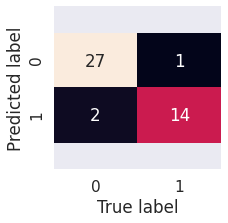

In [ ]:
sns.set(font_scale=1.4)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [ ]:
accuracy_score(y_test, y_preds)*100

93.18181818181817

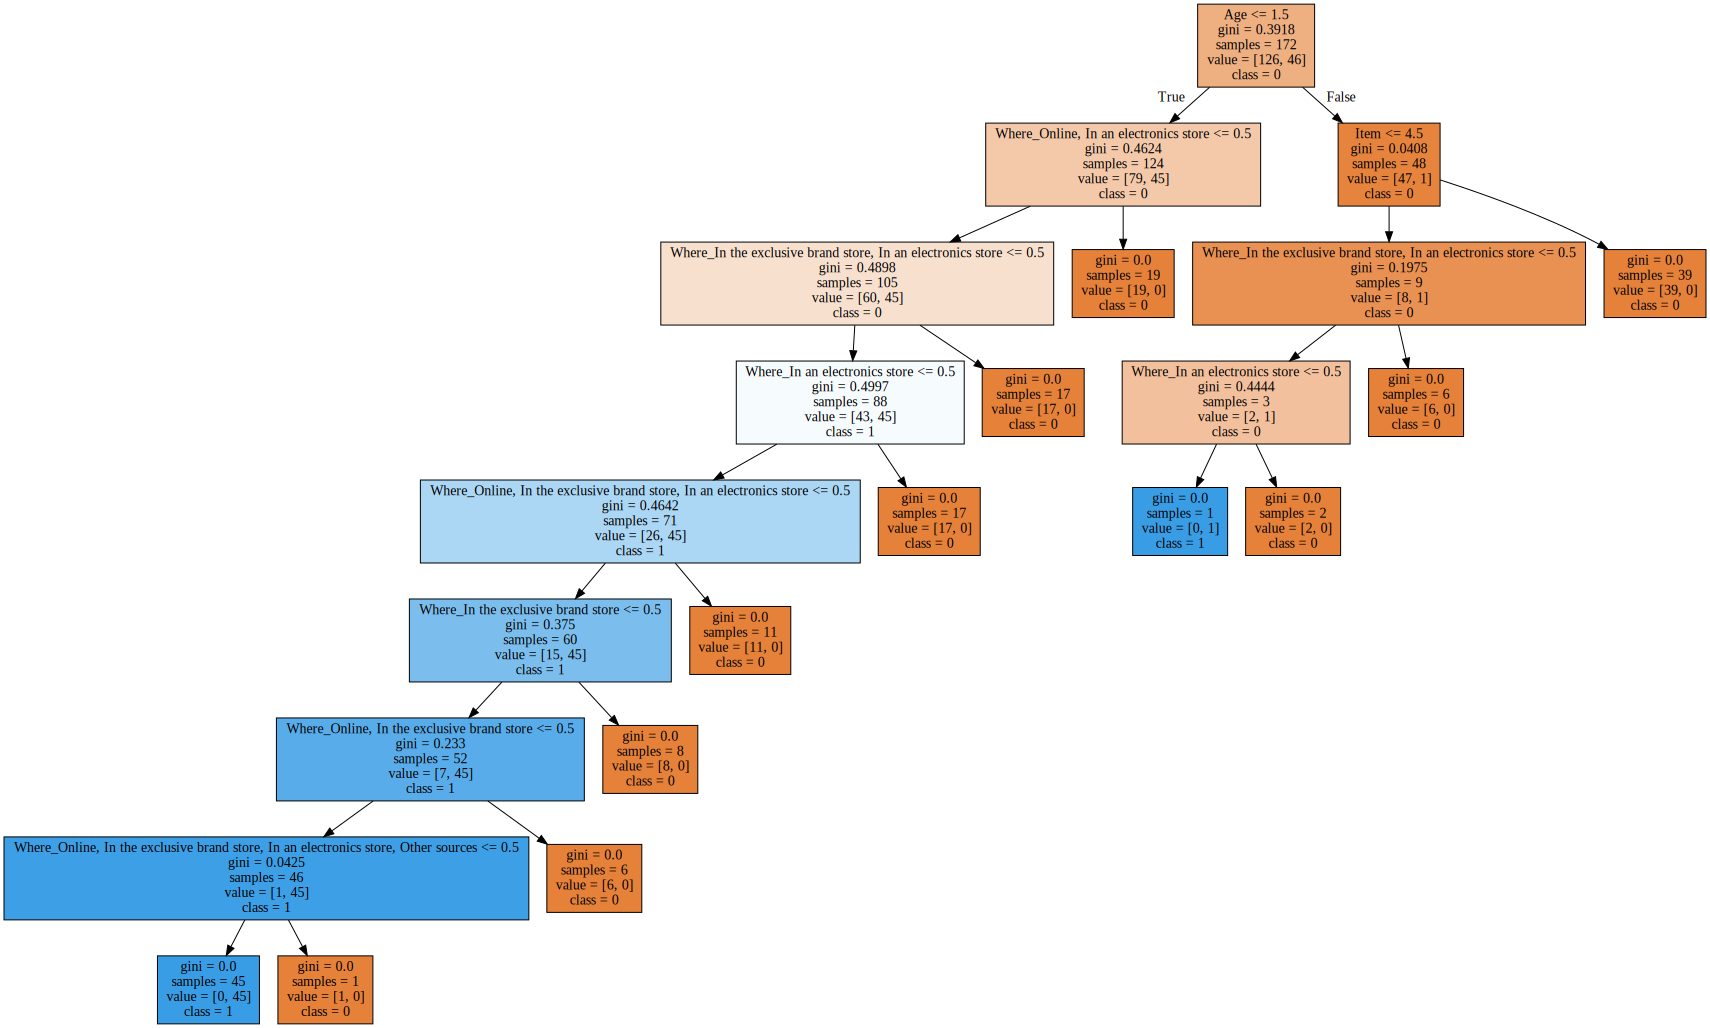

In [ ]:
dot_data = tree.export_graphviz(dct,feature_names = X_train.columns,class_names=["0","1"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

SVM for Online

In [45]:
from sklearn import svm

In [46]:
svmf = svm.SVC(C=10000000, kernel='rbf', degree=4)

In [47]:
model_svm = svmf.fit(X_train, y_train)

In [48]:
pred_svm = model_svm.predict(X_test)

In [49]:
accuracy_score(y_test, pred_svm)*100

90.9090909090909

RFC for Online

In [51]:
#Using RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [52]:
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
y_preds = rfc.predict(X_test)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
      dtype=uint8)

In [54]:
rfc.score(X_train, y_train)*100

100.0

In [55]:
rfc.score(X_test, y_test)*100


86.36363636363636

In [56]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        28
           1       0.92      0.69      0.79        16

    accuracy                           0.86        44
   macro avg       0.88      0.83      0.84        44
weighted avg       0.87      0.86      0.86        44



In [57]:
accuracy_score(y_test, y_preds)*100

86.36363636363636

Improve a model

In [58]:
# Try different numbers of estimators (no cross-validation)
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 86.36363636363636%

Trying model with 20 estimators...
Model accuracy on test set: 86.36363636363636%

Trying model with 30 estimators...
Model accuracy on test set: 86.36363636363636%

Trying model with 40 estimators...
Model accuracy on test set: 81.81818181818183%

Trying model with 50 estimators...
Model accuracy on test set: 84.0909090909091%

Trying model with 60 estimators...
Model accuracy on test set: 90.9090909090909%

Trying model with 70 estimators...
Model accuracy on test set: 86.36363636363636%

Trying model with 80 estimators...
Model accuracy on test set: 86.36363636363636%

Trying model with 90 estimators...
Model accuracy on test set: 88.63636363636364%



**Hyperparamter Tuning with GridSearchCV**

In [59]:
# GridSearchCV
np.random.seed(42)
from sklearn.model_selection import GridSearchCV

# Define the parameters to search over
param_grid = {'n_estimators': [i for i in range(10, 100, 10)]}

# Setup the grid search
grid = GridSearchCV(RandomForestClassifier(),
                    param_grid,
                    cv=5)

# Fit the grid search to the data
grid.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [60]:
# Find the best parameters
grid.best_params_

{'n_estimators': 90}

In [61]:
# Set the model to be the best estimator
rfc = grid.best_estimator_
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
# Fit the best model
rfc = rfc.fit(X_train, y_train)

In [63]:
# Find the best model scores
rfc.score(X_test, y_test)*100

88.63636363636364

Taget Value Pricing of a product

In [71]:
X = final.drop('Factors_Pricing of a product', axis=1)
y = final['Factors_Pricing of a product']

In [72]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [73]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((172, 42), (44, 42), (172,), (44,))

In [74]:
dct2=DecisionTreeClassifier(random_state=42)

In [75]:
dct2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [76]:
y_preds=dct2.predict(X_test)

In [77]:
dct2.score(X_test, y_test)*100

97.72727272727273

In [78]:
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       0.00      0.00      0.00         1

    accuracy                           0.98        44
   macro avg       0.49      0.50      0.49        44
weighted avg       0.96      0.98      0.97        44



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
cm = confusion_matrix(y_test, y_preds)
cm

array([[43,  0],
       [ 1,  0]])

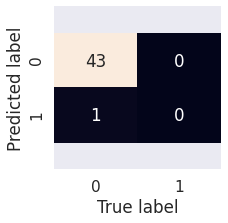

In [80]:
sns.set(font_scale=1.4)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [81]:
accuracy_score(y_test, y_preds)*100

97.72727272727273

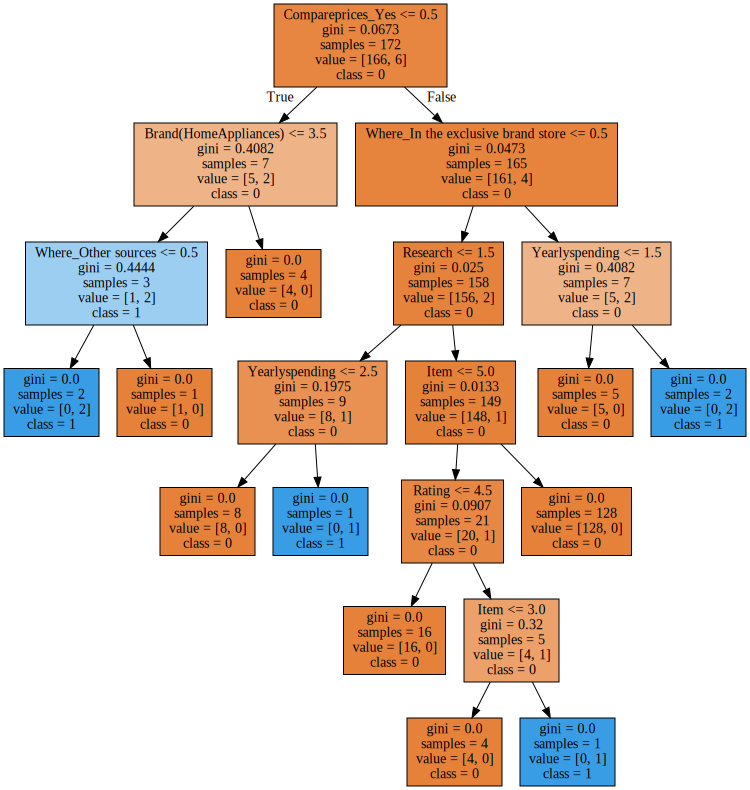

In [82]:
dot_data = tree.export_graphviz(dct2,feature_names = X_train.columns,class_names=["0","1"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

SVM

In [83]:
from sklearn import svm

In [84]:
svmf = svm.SVC(C=10000000, kernel='rbf', degree=4)

In [85]:
model_svm = svmf.fit(X_train, y_train)

In [86]:
pred_svm = model_svm.predict(X_test)

In [87]:
accuracy_score(y_test, pred_svm)*100

97.72727272727273

RFC 


In [88]:
#Using RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [89]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [90]:
y_preds = rfc.predict(X_test)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

In [91]:
rfc.score(X_train, y_train)*100

100.0

In [92]:
rfc.score(X_test, y_test)*100

97.72727272727273

In [93]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       0.00      0.00      0.00         1

    accuracy                           0.98        44
   macro avg       0.49      0.50      0.49        44
weighted avg       0.96      0.98      0.97        44



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
accuracy_score(y_test, y_preds)*100

97.72727272727273

Improve a model

In [96]:
# GridSearchCV
np.random.seed(42)
from sklearn.model_selection import GridSearchCV

# Define the parameters to search over
param_grid = {'n_estimators': [i for i in range(10, 100, 10)]}

# Setup the grid search
grid = GridSearchCV(RandomForestClassifier(),
                    param_grid,
                    cv=5)

# Fit the grid search to the data
grid.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [97]:
# Find the best parameters
grid.best_params_

{'n_estimators': 10}

In [98]:
# Set the model to be the best estimator
rfc = grid.best_estimator_
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
# Fit the best model
rfc = rfc.fit(X_train, y_train)

In [100]:
# Find the best model scores
rfc.score(X_test, y_test)*100

97.72727272727273